In [ ]:
%tensorflow_version 2.x

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

C:\Users\gzfox\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\gzfox\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\gzfox\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\gzfox\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
data = pd.read_csv("account_daily_class28.csv")
#data = data.head()
data.shape

(60327, 36)

In [3]:
data.head()

,User_ID,TIME,BALANCE_PREV,BALANCE,DEPOSIT,CREDIT,EQUITY,Close_PL,Open_PL,MARGIN,...,Ratio4,Ratio5,Ratio6,Account_Score,Combined_Score,Profit_Trades_Ratio,Long_Trades_Ratio,Total_PL,AccountDown_Ratio,PL_5000_DD_25
0,200000062,2021-02-24 21:59:59,2.76,74.58,300.0,0,74.58,-228.18,0.00,0.000000,...,2.02,1.09,0.36,1.520181,3.070766,0.000000,0.0,-1.0,0.0,0
1,200000062,2021-02-25 21:59:59,74.58,247.11,0.0,0,301.76,172.53,54.65,147.105473,...,1.78,1.08,0.36,1.189500,2.117310,0.571429,0.0,-1.0,0.0,0
2,200000062,2021-02-26 21:59:59,247.11,269.56,0.0,0,373.43,22.45,103.87,197.133384,...,1.76,1.08,0.36,1.100562,1.936989,0.631579,0.0,-1.0,0.0,0
3,200000062,2021-02-27 21:59:59,269.56,269.56,0.0,0,373.43,0.00,103.87,197.133384,...,1.76,1.08,0.36,1.100562,1.936989,0.631579,0.0,-1.0,0.0,0
4,200000062,2021-02-28 21:59:59,269.56,269.56,0.0,0,373.43,0.00,103.87,197.133384,...,1.76,1.08,0.36,1.100562,1.936989,0.631579,0.0,-1.0,0.0,0


In [4]:
data.groupby(['PL_5000_DD_25']).count()

,User_ID,TIME,BALANCE_PREV,BALANCE,DEPOSIT,CREDIT,EQUITY,Close_PL,Open_PL,MARGIN,...,Ratio3,Ratio4,Ratio5,Ratio6,Account_Score,Combined_Score,Profit_Trades_Ratio,Long_Trades_Ratio,Total_PL,AccountDown_Ratio
PL_5000_DD_25,,,,,,,,,,,,,,,,,,,,,
0,59881,59881,59881,59881,59881,59881,59881,59881,59881,59881,...,59881,59881,59881,59881,59881,59881,59881,59881,59881,59881
1,446,446,446,446,446,446,446,446,446,446,...,446,446,446,446,446,446,446,446,446,446


In [5]:
data = data.drop(['User_ID', 'TIME', 'BALANCE_PREV', 'BALANCE', 'DEPOSIT', 'CREDIT', 'Close_PL', 'Open_PL', 'MARGIN', 'MARGIN_FREE', 'Sharpe_Ratio_By_Ticket_1W', 'Sharpe_Ratio_By_Ticket_2W', 'Sharpe_Ratio_By_Ticket_1M','Number_of_Ticket', 'Profit_trades', 'Loss_trades', 'Long_trades', 'Short_trades', 'Total_PL', 'AccountDown_Ratio'], axis=1)

In [6]:
data.head()

,EQUITY,Margin_Ratio,Sharpe_Ratio_By_Balance_1W,Sharpe_Ratio_By_Balance_2W,Sharpe_Ratio_By_Balance_1M,Ratio1,Ratio2,Ratio3,Ratio4,Ratio5,Ratio6,Account_Score,Combined_Score,Profit_Trades_Ratio,Long_Trades_Ratio,PL_5000_DD_25
0,74.58,0.000000,-0.38,-0.27,-0.18,1.17,0.71,1.83,2.02,1.09,0.36,1.520181,3.070766,0.000000,0.0,0
1,301.76,0.487492,-0.37,-0.26,-0.18,1.00,0.65,1.83,1.78,1.08,0.36,1.189500,2.117310,0.571429,0.0,0
2,373.43,0.527899,-0.37,-0.26,-0.18,0.97,0.62,1.83,1.76,1.08,0.36,1.100562,1.936989,0.631579,0.0,0
3,373.43,0.527899,-0.37,-0.26,-0.18,0.97,0.62,1.83,1.76,1.08,0.36,1.100562,1.936989,0.631579,0.0,0
4,373.43,0.527899,-0.37,-0.26,-0.18,0.97,0.62,1.83,1.76,1.08,0.36,1.100562,1.936989,0.631579,0.0,0


In [7]:
data['EQUITY'] = StandardScaler().fit_transform(data['EQUITY'].values.reshape(-1, 1))
data['Margin_Ratio'] = StandardScaler().fit_transform(data['Margin_Ratio'].values.reshape(-1, 1))
data['Sharpe_Ratio_By_Balance_1W'] = StandardScaler().fit_transform(data['Sharpe_Ratio_By_Balance_1W'].values.reshape(-1, 1))
#data['Sharpe_Ratio_By_Ticket_1W'] = StandardScaler().fit_transform(data['Sharpe_Ratio_By_Ticket_1W'].values.reshape(-1, 1))
data['Sharpe_Ratio_By_Balance_2W'] = StandardScaler().fit_transform(data['Sharpe_Ratio_By_Balance_2W'].values.reshape(-1, 1))
#data['Sharpe_Ratio_By_Ticket_2W'] = StandardScaler().fit_transform(data['Sharpe_Ratio_By_Ticket_2W'].values.reshape(-1, 1))
data['Sharpe_Ratio_By_Balance_1M'] = StandardScaler().fit_transform(data['Sharpe_Ratio_By_Balance_1M'].values.reshape(-1, 1))
#data['Sharpe_Ratio_By_Ticket_1M'] = StandardScaler().fit_transform(data['Sharpe_Ratio_By_Ticket_1M'].values.reshape(-1, 1))
data['Ratio1'] = StandardScaler().fit_transform(data['Ratio1'].values.reshape(-1, 1))
data['Ratio2'] = StandardScaler().fit_transform(data['Ratio2'].values.reshape(-1, 1))
data['Ratio3'] = StandardScaler().fit_transform(data['Ratio3'].values.reshape(-1, 1))
data['Ratio4'] = StandardScaler().fit_transform(data['Ratio4'].values.reshape(-1, 1))
data['Ratio5'] = StandardScaler().fit_transform(data['Ratio5'].values.reshape(-1, 1))
data['Ratio6'] = StandardScaler().fit_transform(data['Ratio6'].values.reshape(-1, 1))
data['Account_Score'] = StandardScaler().fit_transform(data['Account_Score'].values.reshape(-1, 1))
data['Combined_Score'] = StandardScaler().fit_transform(data['Combined_Score'].values.reshape(-1, 1))
data['Profit_Trades_Ratio'] = StandardScaler().fit_transform(data['Profit_Trades_Ratio'].values.reshape(-1, 1))
data['Long_Trades_Ratio'] = StandardScaler().fit_transform(data['Long_Trades_Ratio'].values.reshape(-1, 1))

In [8]:
data.head()

,EQUITY,Margin_Ratio,Sharpe_Ratio_By_Balance_1W,Sharpe_Ratio_By_Balance_2W,Sharpe_Ratio_By_Balance_1M,Ratio1,Ratio2,Ratio3,Ratio4,Ratio5,Ratio6,Account_Score,Combined_Score,Profit_Trades_Ratio,Long_Trades_Ratio,PL_5000_DD_25
0,-0.137196,-0.480438,-0.353187,-0.534408,-0.368863,-0.023784,-0.102146,-0.037712,-0.025430,-0.024151,-0.022959,-0.014702,-0.014105,-2.094777,-1.769426,0
1,-0.133993,2.445899,-0.344965,-0.516419,-0.368863,-0.023860,-0.137638,-0.037712,-0.028578,-0.024154,-0.022959,-0.014702,-0.014105,0.073836,-1.769426,0
2,-0.132982,2.688459,-0.344965,-0.516419,-0.368863,-0.023873,-0.155384,-0.037712,-0.028840,-0.024154,-0.022959,-0.014702,-0.014105,0.302111,-1.769426,0
3,-0.132982,2.688459,-0.344965,-0.516419,-0.368863,-0.023873,-0.155384,-0.037712,-0.028840,-0.024154,-0.022959,-0.014702,-0.014105,0.302111,-1.769426,0
4,-0.132982,2.688459,-0.344965,-0.516419,-0.368863,-0.023873,-0.155384,-0.037712,-0.028840,-0.024154,-0.022959,-0.014702,-0.014105,0.302111,-1.769426,0


In [10]:
data = np.asarray(data)

In [16]:
data = data[np.argsort(data[:, -1])]
print(data[:, -1].T)

[0. 0. 0. ... 1. 1. 1.]


In [17]:
divide = 0
for n in range(len(data)):
    if data[n][-1] == 1:
        divide = n
        break
print(divide)

59881


In [18]:
false_data = data[:divide]
true_data = data[divide:]
np.save('data_false.npy', false_data)
np.save('data_true.npy', true_data)

In [25]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=0)
X_train = X_train.drop(['PL_5000_DD_25'], axis=1)
y_test = X_test['PL_5000_DD_25']
X_test = X_test.drop(['PL_5000_DD_25'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(48261, 15)

In [26]:
input_dim = X_train.shape[1]
encoding_dim = 8

model = Sequential()
model.add(Dense(encoding_dim, activation="tanh", input_shape=(input_dim,)))
model.add(Dense(int(encoding_dim / 2), activation="relu"))
model.add(Dense(int(encoding_dim / 2), activation='tanh'))
model.add(Dense(input_dim, activation='relu'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 128       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 15)                75        
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [27]:
nb_epoch = 40
batch_size = 32

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

history = model.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    validation_data=(X_test, X_test),
                    verbose=1)

autoencoder = model

Train on 48261 samples, validate on 12066 samples
Epoch 1/40
48261/48261 [==============================] - 1s 21us/sample - loss: 0.9279 - acc: 0.5051 - val_loss: 0.7196 - val_acc: 0.6435
Epoch 2/40
48261/48261 [==============================] - 1s 19us/sample - loss: 0.8823 - acc: 0.6573 - val_loss: 0.6979 - val_acc: 0.6677
Epoch 3/40
48261/48261 [==============================] - 1s 19us/sample - loss: 0.8578 - acc: 0.6924 - val_loss: 0.6706 - val_acc: 0.7244
Epoch 4/40
48261/48261 [==============================] - 1s 18us/sample - loss: 0.8344 - acc: 0.7349 - val_loss: 0.6532 - val_acc: 0.7461
Epoch 5/40
48261/48261 [==============================] - 1s 18us/sample - loss: 0.8192 - acc: 0.7447 - val_loss: 0.6429 - val_acc: 0.7292
Epoch 6/40
48261/48261 [==============================] - 1s 19us/sample - loss: 0.8093 - acc: 0.7448 - val_loss: 0.6350 - val_acc: 0.7508
Epoch 7/40
48261/48261 [==============================] - 1s 21us/sample - loss: 0.8018 - acc: 0.7455 - val_loss: 0.

KeyboardInterrupt: 

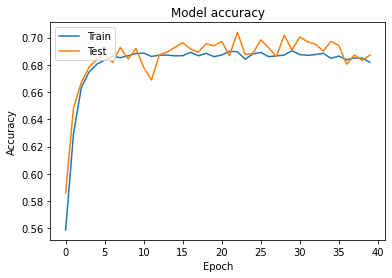

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

In [ ]:
error_df.head()

,reconstruction_error,true_class
58265,0.223752,0
26446,0.218209,0
49158,2.571992,0
40611,0.040275,0
49202,0.126945,0


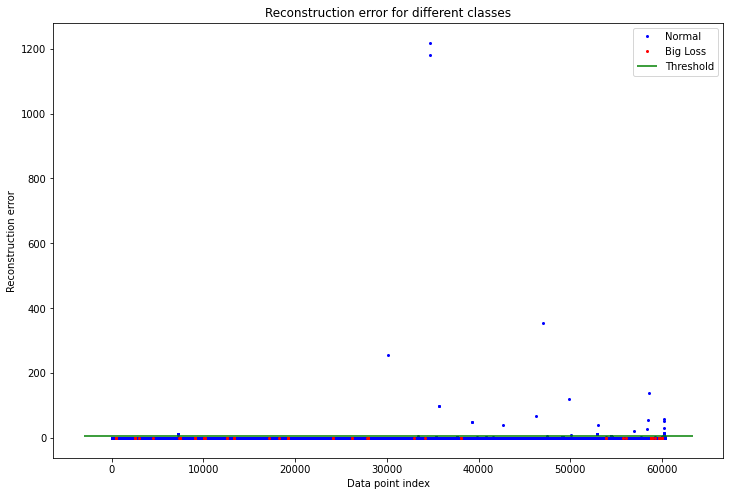

In [ ]:
threshold = 6.0

groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(12, 8))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=2.0, linestyle='',
            label = "Big Loss" if name == 1 else "Normal",
            color = "red" if name == 1 else "blue")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="green", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [ ]:
normal = error_df[error_df.true_class == 0]
bigloss = error_df[error_df.true_class == 1]

print('Normal Transaction Acc/Days: %d, Transaction Acc/Days of big loss: %d' % (len(normal), len(fraud)))

Normal Transaction Acc/Days: 11982, Transaction Acc/Days of big loss: 13


In [ ]:
true_positives = len(bigloss[bigloss.reconstruction_error >= threshold])
false_positives = len(normal[normal.reconstruction_error >= threshold])

true_negatives = len(normal[normal.reconstruction_error < threshold])
false_negatives = len(bigloss[bigloss.reconstruction_error < threshold])

print('True positives: %d, true negatives: %d' % (true_positives, true_negatives))
print('False positives: %d, false negatives: %d' % (false_positives, false_negatives))

True positives: 0, true negatives: 11929
False positives: 53, false negatives: 84


In [1]:
type(data)

NameError: name 'data' is not defined